In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('Dezembro2023.xlsx')

# adequação da base e preenchimento de nulos

In [ ]:
df

,COMPRAS,Valor
0,05/12 CENTER IMPORTADOS E NA,46.80
1,05/12 DAC COMERCIAL LTDA,49.90
2,07/12 PAG*PIZZARIA,209.00
3,07/12 LIDONETA COSMETICOS EI,33.60
4,07/12 LOJAS DAS LAS,16.20
...,...,...
130,15/12 DROGARIA ARAUJO,93.00
131,09/07 G7 JURIDICO,249.91
132,24/12 LOS NETO BARRA CALCADO,149.99
133,26/12 PG *PRATIQUEEMCAS PAC,189.90


In [ ]:
df.columns

Index(['COMPRAS', 'Valor'], dtype='object')

In [ ]:
df = df.rename(columns={'COMPRAS' : 'Descrição'})

In [ ]:
df['Categoria'] = np.nan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Descrição  135 non-null    object 
 1   Valor      135 non-null    float64
 2   Categoria  0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 3.3+ KB


In [ ]:
df['Data'] = df['Descrição'].str[:5]

In [ ]:
df['Descrição'] = df['Descrição'].str[5:]

In [ ]:
df

,Descrição,Valor,Categoria,Data
0,CENTER IMPORTADOS E NA,46.80,NaN,05/12
1,DAC COMERCIAL LTDA,49.90,NaN,05/12
2,PAG*PIZZARIA,209.00,NaN,07/12
3,LIDONETA COSMETICOS EI,33.60,NaN,07/12
4,LOJAS DAS LAS,16.20,NaN,07/12
...,...,...,...,...
130,DROGARIA ARAUJO,93.00,NaN,15/12
131,G7 JURIDICO,249.91,NaN,09/07
132,LOS NETO BARRA CALCADO,149.99,NaN,24/12
133,PG *PRATIQUEEMCAS PAC,189.90,NaN,26/12


In [ ]:
df['Data'] =  df['Data']+ '/23'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%y')
df['Data'] = df['Data'].dt.strftime('%d-%m-%Y')

In [ ]:
df.isnull().sum()

Descrição      0
Valor          0
Categoria    135
Data           0
dtype: int64

In [ ]:
df['Descrição'].unique()

array(['  CENTER IMPORTADOS E NA', '  DAC COMERCIAL LTDA',
       '  PAG*PIZZARIA', '  LIDONETA COSMETICOS EI', '  LOJAS DAS LAS',
       '  MARIA BERNADETE SILVA', '  SUP EPA QUARTOZE',
       '  AMAZON MARKETPLACE', '  PET SHOP E O BICHO', '  SUPER NOSSO',
       '  QUEIJARIA DANELON CRUZ', '  CASA DE CARNES TI TONH',
       '  POSTO DUAS PATRIAS LTD', '  GIRASSOL BIJOUX',
       '  UBER  *UBER  *TRIP', '  PAG*BUSE', '  PAO DO SINO',
       '  TIA ELIANA', '  SUPERMERCADOS BH', '  SUP EPA OITENTA E UM',
       '  SUPERMERCADO E PADARIA', '  MOMENTO SUPER NOSSO',
       '  SHOPING RIO DE JANEIRO', '  SAI WENG', '  CUNHAS BAR',
       '  SACOLAO GUAICUI LTDA', '  ARTESANATO CORTINAS E',
       '  DROGARIAS PACHECO', '  PAG*DRAANAPAULA', '  HIPER CARIJOS',
       '  PORTO SEGURO SEGUROS', '  AZUL WE*FKTNKQLEAO', '  BASICONAWEB',
       '  MARE BEACHWEAR', '  LOCALIZA RAC ACJPA0',
       '  ANJOS EPITACIO PESSOA', '  DROGARIA ARAUJO', '  PG *LE DRESS',
       '  AMAZON BR', '  APOIO MINE

In [ ]:
vest = df['Descrição'].str.contains('LOJAS DAS LAS|INTER STORE|LE DRESS|Venore|OBADIAS|BOUTIQUE|BIJUTE|ARTESANATO|IMPORTADOS|BEACHWEAR|BIJOUX|BASICO|CALCADO|VANS|NETSHOES|Renner|Roupas|Fashion|Allegretto|Constance|COSMETICOS', case=False)
merc = df['Descrição'].str.contains('PAO|APOIO MINEIRO|EPITACIO|ARMAZEMDEMINAS|PADARIA|TUMIATTI|ATACAREJO|Carvalho|Tendtudo|Agili|Villefort|Granel|Varejao|Comercial|Mercearia|Carrefour|Sacolao|Queij|Carne|SUPERMERCADO|Sup', case=False)
viag = df['Descrição'].str.contains('Hotel|Aero|Aereas|Latam|Movida|Localiza|Illas|Bleriot|Katuta|Cuscuz|Bessa|Lanches|Airbnb|Clovis|Azul', case=False)
rest = df['Descrição'].str.contains('Burnets|PIZZARIA|ARABE|ELIANA|CHURRASCARIA|CUNHAS|AQUILO', case=False)
supe = df['Descrição'].str.contains('MERCADOLIVRE|LOTERIAS|HAPPY DAY|PRENSADAO|Amazon|Steam|Spotify|Sorveteria|Netflix|Maga|Electrolux|Cacau|Ifood|Atletico|empada', case=False)
medi = df['Descrição'].str.contains('TOMOGRAFIA|CARIJOS|OFTALMO|DRAANAPAULA', case=False)
farm = df['Descrição'].str.contains('ARAUJO|DROGASI|Farma|Drogaria|Pague Menos', case=False)
maya = df['Descrição'].str.contains('Patas|Petz|PET SHOP', case=False)
esco = df['Descrição'].str.contains('G7|Fgv|Idiomas', case=False)
acad = df['Descrição'].str.contains('SAHL|PRATIQUE', case=False)
tran = df['Descrição'].str.contains('Uber|Posto', case=False)
segu = df['Descrição'].str.contains('Wilam|Seguro|Floriano', case=False)


Vestuario = df[vest]
Mercados = df[merc]
Viagem = df[viag]
Restaurante = df[rest]
Superfluo = df[supe]
Medicos = df[medi]
Farmacia = df[farm]
Maya = df[maya]
Escolas = df[esco]
Academia = df[acad]
Transporte = df[tran]
Seguro = df[segu]

if not Vestuario.empty:
    df.loc[vest, 'Categoria'] = 'Vestuario'
if not Mercados.empty:
  df.loc[merc,'Categoria'] = 'Mercados'
if not Viagem.empty:
    df.loc[viag, 'Categoria'] = 'Viagem'
if not Restaurante.empty:
  df.loc[rest,'Categoria'] = 'Restaurante'
if not Superfluo.empty:
    df.loc[supe, 'Categoria'] = 'Superfluo'
if not Medicos.empty:
  df.loc[medi,'Categoria'] = 'Medicos'
if not Farmacia.empty:
    df.loc[farm, 'Categoria'] = 'Farmacia'
if not Maya.empty:
  df.loc[maya,'Categoria'] = 'Maya'
if not Escolas.empty:
    df.loc[esco, 'Categoria'] = 'Escolas'
if not Academia.empty:
  df.loc[acad,'Categoria'] = 'Academia'
if not Transporte.empty:
    df.loc[tran, 'Categoria'] = 'Transporte'
if not Seguro.empty:
  df.loc[segu,'Categoria'] = 'Seguro'


In [ ]:
df.isnull().sum()

Descrição     0
Valor         0
Categoria    22
Data          0
dtype: int64

In [ ]:
df['Categoria'] = df['Categoria'].fillna('Outros')

# analise

In [ ]:
df.head(20)

,Descrição,Valor,Categoria,Data
0,CENTER IMPORTADOS E NA,46.80,Vestuario,05-12-2023
1,DAC COMERCIAL LTDA,49.90,Mercados,05-12-2023
2,PAG*PIZZARIA,209.00,Restaurante,07-12-2023
3,LIDONETA COSMETICOS EI,33.60,Vestuario,07-12-2023
4,LOJAS DAS LAS,16.20,Vestuario,07-12-2023
5,MARIA BERNADETE SILVA,20.00,Outros,07-12-2023
6,CENTER IMPORTADOS E NA,54.00,Vestuario,07-12-2023
7,SUP EPA QUARTOZE,55.00,Mercados,08-12-2023
8,AMAZON MARKETPLACE,71.22,Superfluo,08-12-2023
9,MARIA BERNADETE SILVA,38.50,Outros,08-12-2023


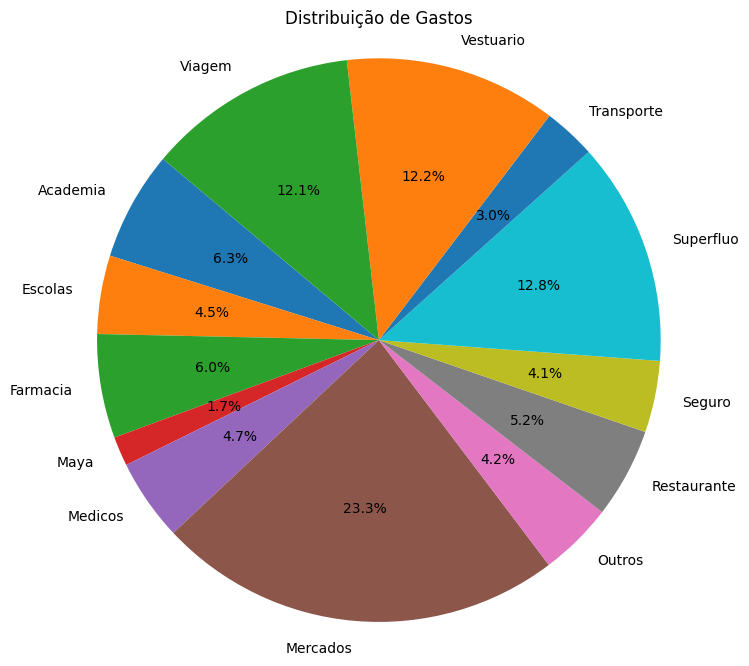

In [ ]:
agrupado = df.groupby('Categoria')['Valor'].sum().reset_index()

categorias = agrupado['Categoria']
valores = agrupado['Valor']

plt.figure(figsize=(8, 8))
plt.pie(valores, labels=categorias, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Gastos')
plt.axis('equal')
plt.savefig('grafico_de_pizza.png')
plt.show()

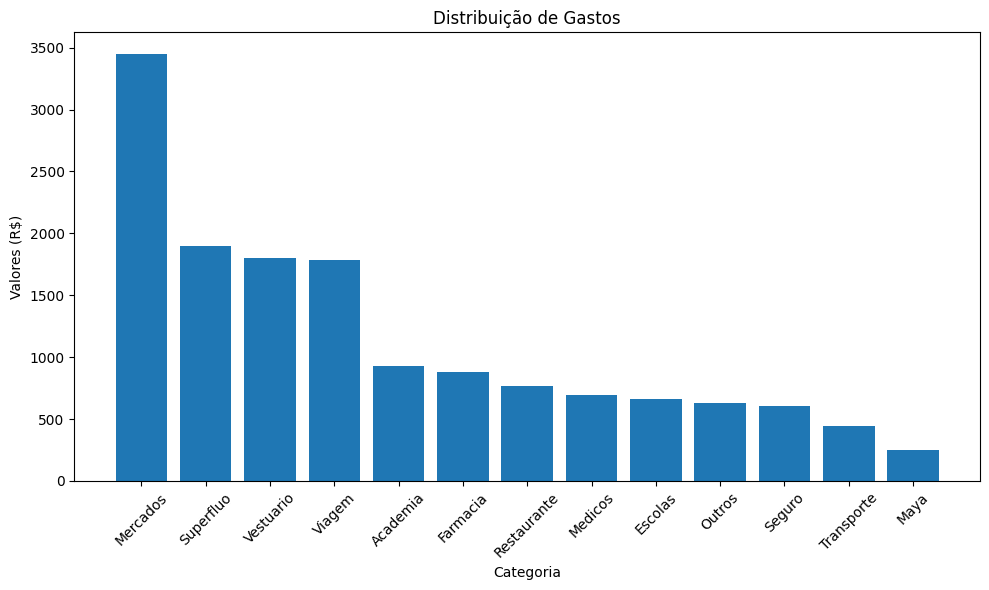

In [ ]:
categorias, valores = zip(*sorted(zip(categorias, valores), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10, 6))
plt.bar(categorias, valores)
plt.title('Distribuição de Gastos')
plt.xlabel('Categoria')
plt.ylabel('Valores (R$)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('grafico_de_barras.png')
plt.show()